In [1]:
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("results.csv")

In [3]:
df

,Total Size,Number of Buckets,Thread Count,Parallel,Sort Function,Cutoff,I mean,I std,CC mean,CC std,Texe mean,Texe std,CPI mean,CPI std
0,1000,10,1,1,quicksort,1000,1.331400e+05,2287.273438,1.085975e+05,0.025415,27.459999,0.025415,0.815896,0.025415
1,1000,10,2,1,quicksort,1000,8.364952e+04,1863.231567,6.546351e+04,0.052695,17.295000,0.052695,0.782457,0.052695
2,1000,10,3,1,quicksort,1000,7.081162e+04,4576.670410,5.968245e+04,0.070760,16.040001,0.070760,0.845205,0.070760
3,1000,10,4,1,quicksort,1000,6.643426e+04,1689.984863,5.329775e+04,0.086123,14.505000,0.086123,0.801505,0.086123
4,1000,10,5,1,quicksort,1000,6.131279e+04,4902.618164,5.028698e+04,0.093102,13.870000,0.093102,0.819478,0.093102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,100000,1000,2,1,quicksortparallel,10,1.177232e+07,280811.031250,9.373205e+06,0.052867,2348.435059,0.052867,0.796253,0.052867
752,100000,1000,2,1,quicksortparallel,100,9.421754e+06,214024.265625,7.531577e+06,0.039412,3080.655029,0.039412,0.799273,0.039412
753,100000,1000,2,1,quicksortparallel,1000,9.383870e+06,208927.765625,7.624743e+06,0.046037,3090.735107,0.046037,0.812574,0.046037
754,100000,1000,2,1,quicksortparallel,10000,9.489529e+06,70349.750000,7.493619e+06,0.010138,2997.500000,0.010138,0.789675,0.010138


In [127]:
def filter_and_plot(df, all_xs, x_dict, y_var="I", num_ticks=20):
    r = df
    for key in x_dict:
        r = r[r[key] == x_dict[key]]
    x_key = list(set(all_xs).symmetric_difference(set([key for key in x_dict])))[0]
    keep_keys = [y_var + " mean", y_var + " std"] + [x_key]
    r = r[keep_keys]
    
    x = r[x_key].to_numpy()
    y = r[y_var + " mean"].to_numpy()
    yerror = r[y_var + " std"].to_numpy()
    uppery = y + 5 * yerror
    lowery = y - 5 * yerror
    
    ymin, ymax = min(lowery), max(uppery)
    yticks = [ymin + i * (ymax - ymin) / num_ticks for i in range(num_ticks)]
    title = ""
    for key in x_dict:
        title += f"{key}={x_dict[key]} "
    title += "\n"
    plt.title(title)
    #plt.errorbar(x, y, yerr=5 * yerror, ecolor='g', capthick=0, capsize=0)
    plt.plot(x, y)
    plt.fill_between(x, lowery, uppery, alpha=0.2)
    plt.grid(True)
    plt.xlabel(x_key)
    plt.yticks(yticks)
    print(set(list(x)))
    plt.xticks((list(x)))
    plt.ylabel(y_var)
    plt.show()
    
    print(yerror)

In [85]:
print(list(key for key in df))

['Total Size', 'Number of Buckets', 'Thread Count', 'Parallel', 'Sort Function', 'Cutoff', 'I mean', ' I std', ' CC mean', ' CC std', ' Texe mean', ' Texe std', ' CPI mean', ' CPI std']


In [129]:
all_xs = ["Cutoff", "Thread Count", "Number of Buckets", "Total Size"]
x_dict = {
    "Number of Buckets": 1000,
    "Cutoff": 1000,
    "Total Size": 10000000
}

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


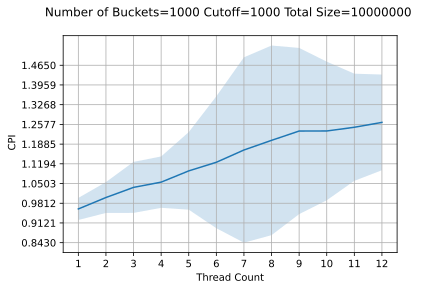

[0.007741 0.010822 0.017884 0.018009 0.027194 0.046235 0.064982 0.066466
 0.058256 0.048594 0.037561 0.033537]


In [130]:
filter_and_plot(df, all_xs, x_dict, y_var=" CPI", num_ticks=10)

In [115]:
s = {1, 2, 3}
len(s)

3